Tempurature at time 0? How quickly does the tea cool? Temp as time tends towards inf?

Initial tempurature at time zero : 84.08442551369478
The Tea doesn't cool linearly but roughly, every 600 seconds the tempurature decreases by two thirds.
Time it takes (in seconds) to reach a safe drinking tempurature of 60 degrees : 288.25100460420657
The final tempurature of the tea after waiting an infinite amount of time :21.01152864778104


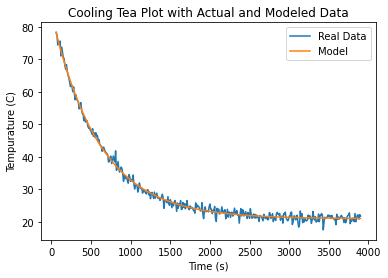

In [262]:
import numpy as np
import math 
import scipy.io
import scipy.optimize
import matplotlib.pyplot as plt
%matplotlib inline


time = np.array([None] * 385)
time = time.astype(float) #This line needed or else matlab array read in as int
Temp = np.array([None] * 385) 
params = (None, None, None)


def model_old(t, Ti, Ta, C): #not needed anymore
    if isinstance(t, np.ndarray):
        T = [None] * len(t) #works fine with-> T = [None] * len(t)
        for i in range(len(t)):
            T[i] = (Ti - Ta)*np.exp(-t[i]/C) + Ta  
        return T
    T = (Ti - Ta)*np.exp(-t/C) + Ta
    return T


def model(t, Ti, Ta, C):
    T = (Ti - Ta) * np.exp(-t/C) + Ta
    return T


def extract_parameters(ts, Ts):
    p0 = np.array([70, 20, 530]) #initial function parameter guesses
    func_params, conv = scipy.optimize.curve_fit(model, ts, Ts, p0)
    return func_params[0], func_params[1], func_params[2] #need to use commas here to return tuple


def sixty_degree_time(Ti, Ta, C):
        timeTillSixty = -C * np.log((60.0 - Ta)/(Ti - Ta)) #equation re-arranged
        return timeTillSixty


matlab_load = scipy.io.loadmat("time_temp.mat")
matlab_array = np.array([1])
matlab_array = test["data"]
for i in range(len(matlab_array)):  #creates time and temp vector from array
    time[i] = matlab_array[i][0]
    Temp[i] = matlab_array[i][1]
params = extract_parameters(time, Temp)

print("Initial tempurature at time zero : ", end="")
print(params[0])
print("The Tea doesn't cool linearly but roughly, every 600 seconds the tempurature decreases by two thirds.")
print("Time it takes (in seconds) to reach a safe drinking tempurature of 60 degrees : ", end = "")
print(sixty_degree_time(params[0], params[1], params[2]))
print("The final tempurature of the tea after waiting an infinite amount of time :", end="")
print(params[1])

plt.plot(time, Temp, label="Real Data")
plt.plot(time, model(time, params[0], params[1], params[2]), label="Model")
plt.xlabel("Time (s)")
plt.ylabel("Tempurature (C)")
plt.title("Cooling Tea Plot with Actual and Modeled Data")
plt.legend()
plt.show()
